<a href="https://datamics.com/de/courses/"><img src=./DATA/bg_datamics_top.png></a>

<em text-align:center>© Datamics</em>
# MNIST mit Multi-Layer Perceptron

In dieser Lektion werden wir ein Multi Layer Perceptron Modell erstellen und versuchen damit handgeschriebenen Zahlen zu klassifizieren. Das ist ein sehr verbreitetes Einsteigerproblem für Tensorflow.

Denkt daran, dass eine einzige Lektion niemals ausreichen wird, um Deep Learning und/oder Tensorflow in seiner Komlexität abzudecken!

## Die Daten laden

Wir werden die berühmten MNIST Daten über [handgeschriebenen Zahlen](http://yann.lecun.com/exdb/mnist/) verwenden.

Die Bilder die wir verwenden werden sind schwarz-weiß Bilder der größe 28 x 28, d.h. 784 Pixel insgesamt. Unsere Features werden die Pixelwerte für jeden Pixel sein. Entweder ist der Pixel "weiß" (also eine 0 in den Daten) oder er hat einen Pixelwert.

Wir werden versuchen korrekt vorherzusagen, welche Nummer geschrieben steht. Dazu verwenden wir lediglich die Bilddaten in Form unseres Arrays. Diese Art von Problem (Image Recognition oder auf Deutsch: Bilderkennung) ist ein tolle Use Case für Deep Learning Methoden!

Die Daten sind für Deep Learning das, was der Iris Datensatz für typische Machine Learning Algorithmen ist.

Laden wir die Daten:

In [79]:
import tensorflow as tf

# Importiere MINST Daten
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
    

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


## Daten Format

Die Daten sind im Vektor Format gespeichert, obwohl die Originaldaten eine 2-dimensionale Matrix waren, die angab, wie viele Pigmente sich an welcher Position befinden. Untersuchen wir das genauer:

In [80]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [81]:
type(mnist.train.images)

numpy.ndarray

In [82]:
#mnist.train.images[0]
mnist.train.images[2].shape

(784,)

In [83]:
sample = mnist.train.images[2].reshape(28,28)

In [84]:
import matplotlib.pyplot as plt
%matplotlib inline

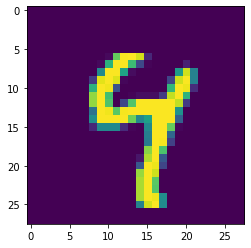

In [85]:
plt.imshow(sample)

## Parameter

Wir werden 4 Parameter definieren müssen. Es ist wirklich (wirklich) schwer gute Parameterwerte für einen Datensatz zu bestimmen, mit dem man keine Erfahrung hat. Da dieser MNIST Datensatz allerdings so berühmt ist haben wir schon einige Ausgangswerte. Die Parameter sind:

* Learning Rate - Wie schnell die Kostenfunktion angepasst wird
* Traing Epochs - Wie viele Trainingszyklen durchlaufen werden sollen
* Batch Size - Größe der "Batches" an Traingsdaten

In [138]:
# Parameter
learning_rate = 0.001
training_epochs = 5
batch_size = 100

### Netzwerk Parameter

Hier haben wir Parameter welche unser Neuronales Netz direkt definieren. Diese werden entsprechend der betrachteten Daten angepasst und hängen auch davon ab, welche Art von Netz man nutzt. Es sind bis zu diesem Punkt erst einmal nur Zahlen, die wir später verwenden, um unser Netz zu definieren:

In [87]:
# Netzwerk Parameter
n_hidden_1 = 256 # 1. Layer: Anzahl an Features
n_hidden_2 = 256 # 2. Layer: Anzahl an Features
n_input = 784 # MNIST Daten Input (img shape: 28*28)
n_classes = 10 # MNIST Klassen (0-9 Zahlen)
n_samples = mnist.train.num_examples

### Tensorflow Graph Input

In [88]:
x = tf.placeholder("float", [None, n_input])
y = tf.placeholder("float", [None, n_classes])

## MultiLayer Modell

Es ist Zeit unser Modell zu erstellen. Wiederholen wir deshalb kurz, was wir erstellen wollen:

Zuerst erhalten wir einen *Input* in Form eines Datenarrays und schicken diesen an die erste *Hidden Layer*. Dann wird den Daten ein  *Weight* zwischen den Schichten zugewiesen (welches zuerst ein zufälliger Wert ist). Anschließend wird es an einen *Node* geschicht und unterläuft eine *Activation Function* (zusammen mit einem Bias, wie in der Neural Network Lektion erwähnt). Dann geht es weiter zur nächsten *Layer* und immer so weiter, bis zur finalen *Output Layer*. In unserem Fall werden wir nur 2 *Hidden Layers* verwenden. Je mehr wir davon verwenden, desto länger braucht das Modell (aber er hat mehr Möglichkeiten um die Genauigkeit zu erhöhen).

Sobald die transformierte Daten die *Output Layer* erreicht haben müssen wir sie auswerten. Hier verwenden wir eine *Loss Function* (auch Cost Function genannt). Diese berechnet, wie sehr wir vom gewünschten Ergebnis entfernt sind. In diesem Fall: Wie viele der Klassen wir richtig zugeteilt haben.

Dann wenden wir eine Optimierungsfunktion an, um die *Costs* (bzw. den Error) zu minimieren. Dies geschiet durch die Anpassung der *Weights* entlang des Netzes. Wir verwenden in unserem Beispiel den [Adam Optimizer](https://arxiv.org/pdf/1412.6980v8.pdf), welcher eine (im Vergleich zu anderen) sehr neue Entwicklung ist.

Wir können anpassen, wie schnell diese Optimierung angewendet wird, indem wir unseren *Learning Rate* Parameter anpassen. Je geringer die Rate, desto höher die Möglichkeiten für Anpassungen. Dies erzeugt allerdings die Kosten einer erhöhten Wartezeit. Ab einem bestimmten Punkt lohnt es sich nicht mehr, die Learning Rate weiter zu senken.

Jetzt können wir unser Modell erstellen. Wir beginnen mit 2 Hidden Layers, welche die []() Activation Function verwenden. Dies ist eine einfache Umformungsfunktion, die entweder x oder 0 zurückgibt. Für unsere finale Output Layer verwenden wir eine lineare Activation mit Matrixmultiplikation:

In [89]:
def multilayer_perceptron(x, weights, biases):
    '''
    x : Platzhalter für den Dateninput
    weights: Dictionary der Weights
    biases: Dictionary Der Biases
    '''
    
    # Erste Hidden layer mit RELU Activation
    layer_1 = tf.add(tf.matmul(x, weights['h1']), biases['b1'])
    layer_1 = tf.nn.relu(layer_1)
    
    # Zweite Hidden layer mit RELU Activation
    layer_2 = tf.add(tf.matmul(layer_1, weights['h2']), biases['b2'])
    layer_2 = tf.nn.relu(layer_2)
    
    # Letzte Output layer mit linearer Activation
    out_layer = tf.matmul(layer_2, weights['out']) + biases['out']
    return out_layer

## Weights und Bias

Damit unser Tensorflow Modell funktioniert müssen wir zwei Dictionaries anlegen, die unsere Weights und Biases enthalten. Wir können das `tf.variable` Objekt verwenden. Dies ist anders als eine Konstante, da Tensorflow's Graph Objekt alle Zustände der Variablen wahrnimmt. Eine Variable ist ein anpassbares Tensor, der zwischen Tensorflow's Graph von interagierenden Operationen lebt. Er kann durch die Berechnung verwendet und verändert werden. Wir werden die Modell Parameter generell als Variablen verwenden. Aus der Dokumentation können wir entnehmen:

    A variable maintains state in the graph across calls to `run()`. You add a variable to the graph by constructing an instance of the class `Variable`.

    The `Variable()` constructor requires an initial value for the variable, which can be a `Tensor` of any type and shape. The initial value defines the type and shape of the variable. After construction, the type and shape of the variable are fixed. The value can be changed using one of the assign methods.
    
Wir werden Tensorflow's eingebaute `random_normal` Methode verwenden, um zufällige Werte für unsere Weights und Biases zu erstellen.

In [90]:
weights = {
    'h1': tf.Variable(tf.random_normal([n_input, n_hidden_1])),
    'h2': tf.Variable(tf.random_normal([n_hidden_1, n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_hidden_2, n_classes]))
}

In [91]:
biases = {
    'b1': tf.Variable(tf.random_normal([n_hidden_1])),
    'b2': tf.Variable(tf.random_normal([n_hidden_2])),
    'out': tf.Variable(tf.random_normal([n_classes]))
}

In [92]:
# Model erstellen
pred = multilayer_perceptron(x, weights, biases)

## Cost und Optimierungs-Funktion

Wir verwenden Tensorflow's eingebaute Funktionen für diesesn Teil. Weitere Details bietet die Dokumentation:

In [93]:
# Cost und Optimierungsfunktion definieren
cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels = y, logits=pred))


In [94]:
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate).minimize(cost)

### Initialisierung der Variablen

Wir initialisieren nun alle tf.Variable Objekte die wir zuvor erstellt haben. Das wird das erste sein, dass wir ausführen, wenn wir unser Modell trainieren.

In [95]:
init = tf.global_variables_initializer()

## Das Modell trainieren

### next_batch()

Bevor wir beginnen möchte ich eine weitere nützliche Funktion in unserem MNIST Datenobjekt abdecken, die `next_batch` heißt. Diese gibt ein Tupel in der Form (X,y) mit einem X Array der Daten und einem y Array der Klasse. Zum Beispiel:

In [96]:
Xsamp,ysamp = mnist.train.next_batch(1)

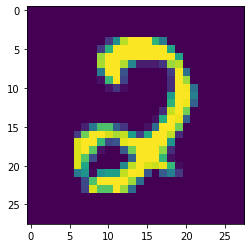

In [97]:
plt.imshow(Xsamp.reshape(28,28))

In [103]:
print(ysamp)

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]]


## Decorator für Logging und Timing einführen

In [104]:
# Decorators
from functools import wraps

def my_logger(orig_func):
    import logging
    logging.basicConfig(filename='{}.log'.format(orig_func.__name__), level=logging.INFO)

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        logging.info(
            'Ran with args: {}, and kwargs: {}'.format(args, kwargs))
        return orig_func(*args, **kwargs)

    return wrapper


def my_timer(orig_func):
    import time

    @wraps(orig_func)
    def wrapper(*args, **kwargs):
        t1 = time.time()
        result = orig_func(*args, **kwargs)
        t2 = time.time() - t1
        print('{} ran in: {} sec'.format(orig_func.__name__, t2))
        return result

    return wrapper

## Die Session ausführen

Jetzt ist es Zeit unsere Session auszuführen! Achte darauf wie wir zwei Schleifen verwenden. Die äußere, die die Epochs durchläuft, und die innere, die die Batches für jede Epoch des Trainings ausführt.

In [120]:
# starte Session
sess = tf.InteractiveSession()

# Variablen initialisieren
sess.run(init)

# Training Epochs
# with additional wrapper (logger and timer)
@my_logger
@my_timer
def train_modell(training_epochs):
    for epoch in range(training_epochs):

        # Start mit cost = 0.0
        avg_cost = 0.0

        # Konvertiere die Anzahl an Batches in eine Integer
        total_batch = int(n_samples/batch_size)

        # Schleife für alle Batches
        for i in range(total_batch):

            # Den nächsten Batch an Trainingsdaten und -lables nehmen
            batch_x, batch_y = mnist.train.next_batch(batch_size)

            # Dictionary für Optimierung und Cost bereitstellen
            _, c = sess.run([optimizer, cost], feed_dict={x: batch_x, y: batch_y})

            # Durchschnittliche Kosten berechnen
            avg_cost += c / total_batch

        print("Epoch: {} Cost={:.4f}".format(epoch+1,avg_cost))

    print("Modellierung ist beendet: {} Epochs of Training".format(training_epochs))
    print()

In [121]:
#train_modell(training_epochs)

## Modell Auswertung

Tensorflow bietet einige eingebaute Funktionen, die uns bei der Auswertung helfen. Dazu gehören `tf.equal` und `tf.reduce_mean`.


### tf.equal

Dies ist im Grunde genommen nur eine Kontrolle, ob die Vorhersagen mit den Labels übereinstimmen. Da wir in unserem Fall wissen, dass die Labels eine 1 in einem Array von Nullen sind, können wir `argmax()` verwenden, um die Position zu vergleichen. Denke daran, dass y immer noch der Platzhalter ist, den wir anfangs erstellt haben. Wir werden eine Reihe an Operationen durchführen, um einen Tensor zu erhalten, in den wir die Testdaten einlesen können, um es auszuwerten.

In [122]:
# Teste das Modell
correct_predictions = tf.equal(tf.argmax(pred, 1), tf.argmax(y, 1))

In [123]:
print(correct_predictions[0])

Tensor("strided_slice_6:0", shape=(), dtype=bool)


Um numerische Werte für unsere Vorhersagen zu erhalten müssen wir `tf.cast` verwenden, um den Tensor mit Booleans zurückzuführen in einen Tensor mit Floats. Dann können wir den Durchschnitt nehmen.

In [124]:
correct_predictions = tf.cast(correct_predictions, "float")

In [125]:
print(correct_predictions[0])

Tensor("strided_slice_7:0", shape=(), dtype=float32)


Jetzt können wir `tf.reduce_mean` verwenden, um den Durchschnitt der Elemente im Tensor zu erhalten:

In [126]:
accuracy = tf.reduce_mean(correct_predictions)

In [127]:
type(accuracy)

tensorflow.python.framework.ops.Tensor

Das wirkt evtl. etwas merkwürdig, aber diese Genauigkeit ist immer noch ein Tensor Objekt. Denke daran, dass wir immer noch die tatsächlichen Testdaten übergeben müssen. Jetzt können wir die MNIST Testlabels und Bilder aufrufen und die Genauigkeit auswerten!

In [128]:
mnist.test.labels

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [129]:
mnist.test.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Die `eval()` Methode erlaubt es uns direkt in der Session den Tensor auszuwerten ohne `tf.sess():mm` aufrufen zu müssen

In [130]:
#print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

94%! Nicht schlecht! Aber das ist noch lange nicht zu gut, wie wir es schaffen können. Mehr Trainingsdurchläuft (Epochs) mit diesen Daten (ca. 20000) können eine Genauigkeit von 99% erreichen. Da dies sehr lange dauert werden wir es hier nicht durchführen.

In [135]:
confusion = tf.confusion_matrix(
       labels = tf.argmax( mnist.test.labels, 1 ),
       predictions = tf.argmax( pred, 1 ) )

In [136]:
#print(confusion.eval({x:mnist.test.images, y:mnist.test.labels}))

In [139]:
train_modell(training_epochs)
print()
print ('MNIST:', x.shape, y.shape)
print()
print("Accuracy:", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))
print()
print("Confusion Matrix:\n")
print(confusion.eval({x:mnist.test.images, y:mnist.test.labels}))

Epoch: 1 Cost=0.3884
Epoch: 2 Cost=0.3706
Epoch: 3 Cost=0.3501
Epoch: 4 Cost=0.3723
Epoch: 5 Cost=0.3370
Modellierung ist beendet: 5 Epochs of Training

train_modell ran in: 26.56128692626953 sec

MNIST: (?, 784) (?, 10)

Accuracy: 0.9534

Confusion Matrix:

[[ 963    0    2    1    0    4    6    1    1    2]
 [   0 1126    2    0    2    1    2    0    2    0]
 [  11    3  971   16    5    3    3    6   14    0]
 [   1    1    9  969    0   14    0    4    8    4]
 [   9    4    7    1  934    0    4    0    3   20]
 [   5    1    0   16    4  835    9    1   14    7]
 [   8    2    2    0    6   14  921    0    4    1]
 [   1    6   16    7    5    0    0  964    6   23]
 [   9    2    7   12    5    8    6    4  909   12]
 [   6    5    0   11   18    5    1    8   13  942]]


In [150]:
import unittest

class TestNotebook(unittest.TestCase):

    def test_train_modell(self):
        self.train = train_modell(training_epochs)
        self.assertEqual(self.train.fit(), self.train_accuracy) 
        self.assertEqual(self.train.train_confusion_matrix.tolist(), self.train_confusion_matrix.tolist())


unittest.main(argv=[''], verbosity=2, exit=False)

test_train_modell (__main__.TestNotebook) ... 

Epoch: 1 Cost=0.2377
Epoch: 2 Cost=0.2363
Epoch: 3 Cost=0.3457
Epoch: 4 Cost=0.2206
Epoch: 5 Cost=0.2509
Modellierung ist beendet: 5 Epochs of Training

train_modell ran in: 25.397534132003784 sec


ERROR

ERROR: test_train_modell (__main__.TestNotebook)
----------------------------------------------------------------------
Traceback (most recent call last):
  File "<ipython-input-150-d69f4741150c>", line 7, in test_train_modell
    self.assertEqual(self.train.fit(), self.train_accuracy)
AttributeError: 'NoneType' object has no attribute 'fit'

----------------------------------------------------------------------
Ran 1 test in 25.399s

FAILED (errors=1)
